<a href="https://colab.research.google.com/github/daniellejw/Final-Project/blob/main/FinalProjectDanielleW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PANIC ATTACKS IN MIDST OF A PANDEMIC**

---





For my final project, I plan to examine mental health in the midst of a pandemic with data created with [Google Trends](https://trends.google.com/trends/?geo=US). I wanted to test if there was any corerlation between covid cases and panic attacks. The data consists of a number of items Google Trends from the past 12 months showing the number of times people have searched about 'panic attacks'. Mental Health reports the prevalence of panic attack searches in the past year by state, city, metropolitan area and dates.

[GitHub](https://github.com/daniellejw/Final-Project) - For anyone interested in the data that was used in this project, follow the link embedded in 'GitHub'.

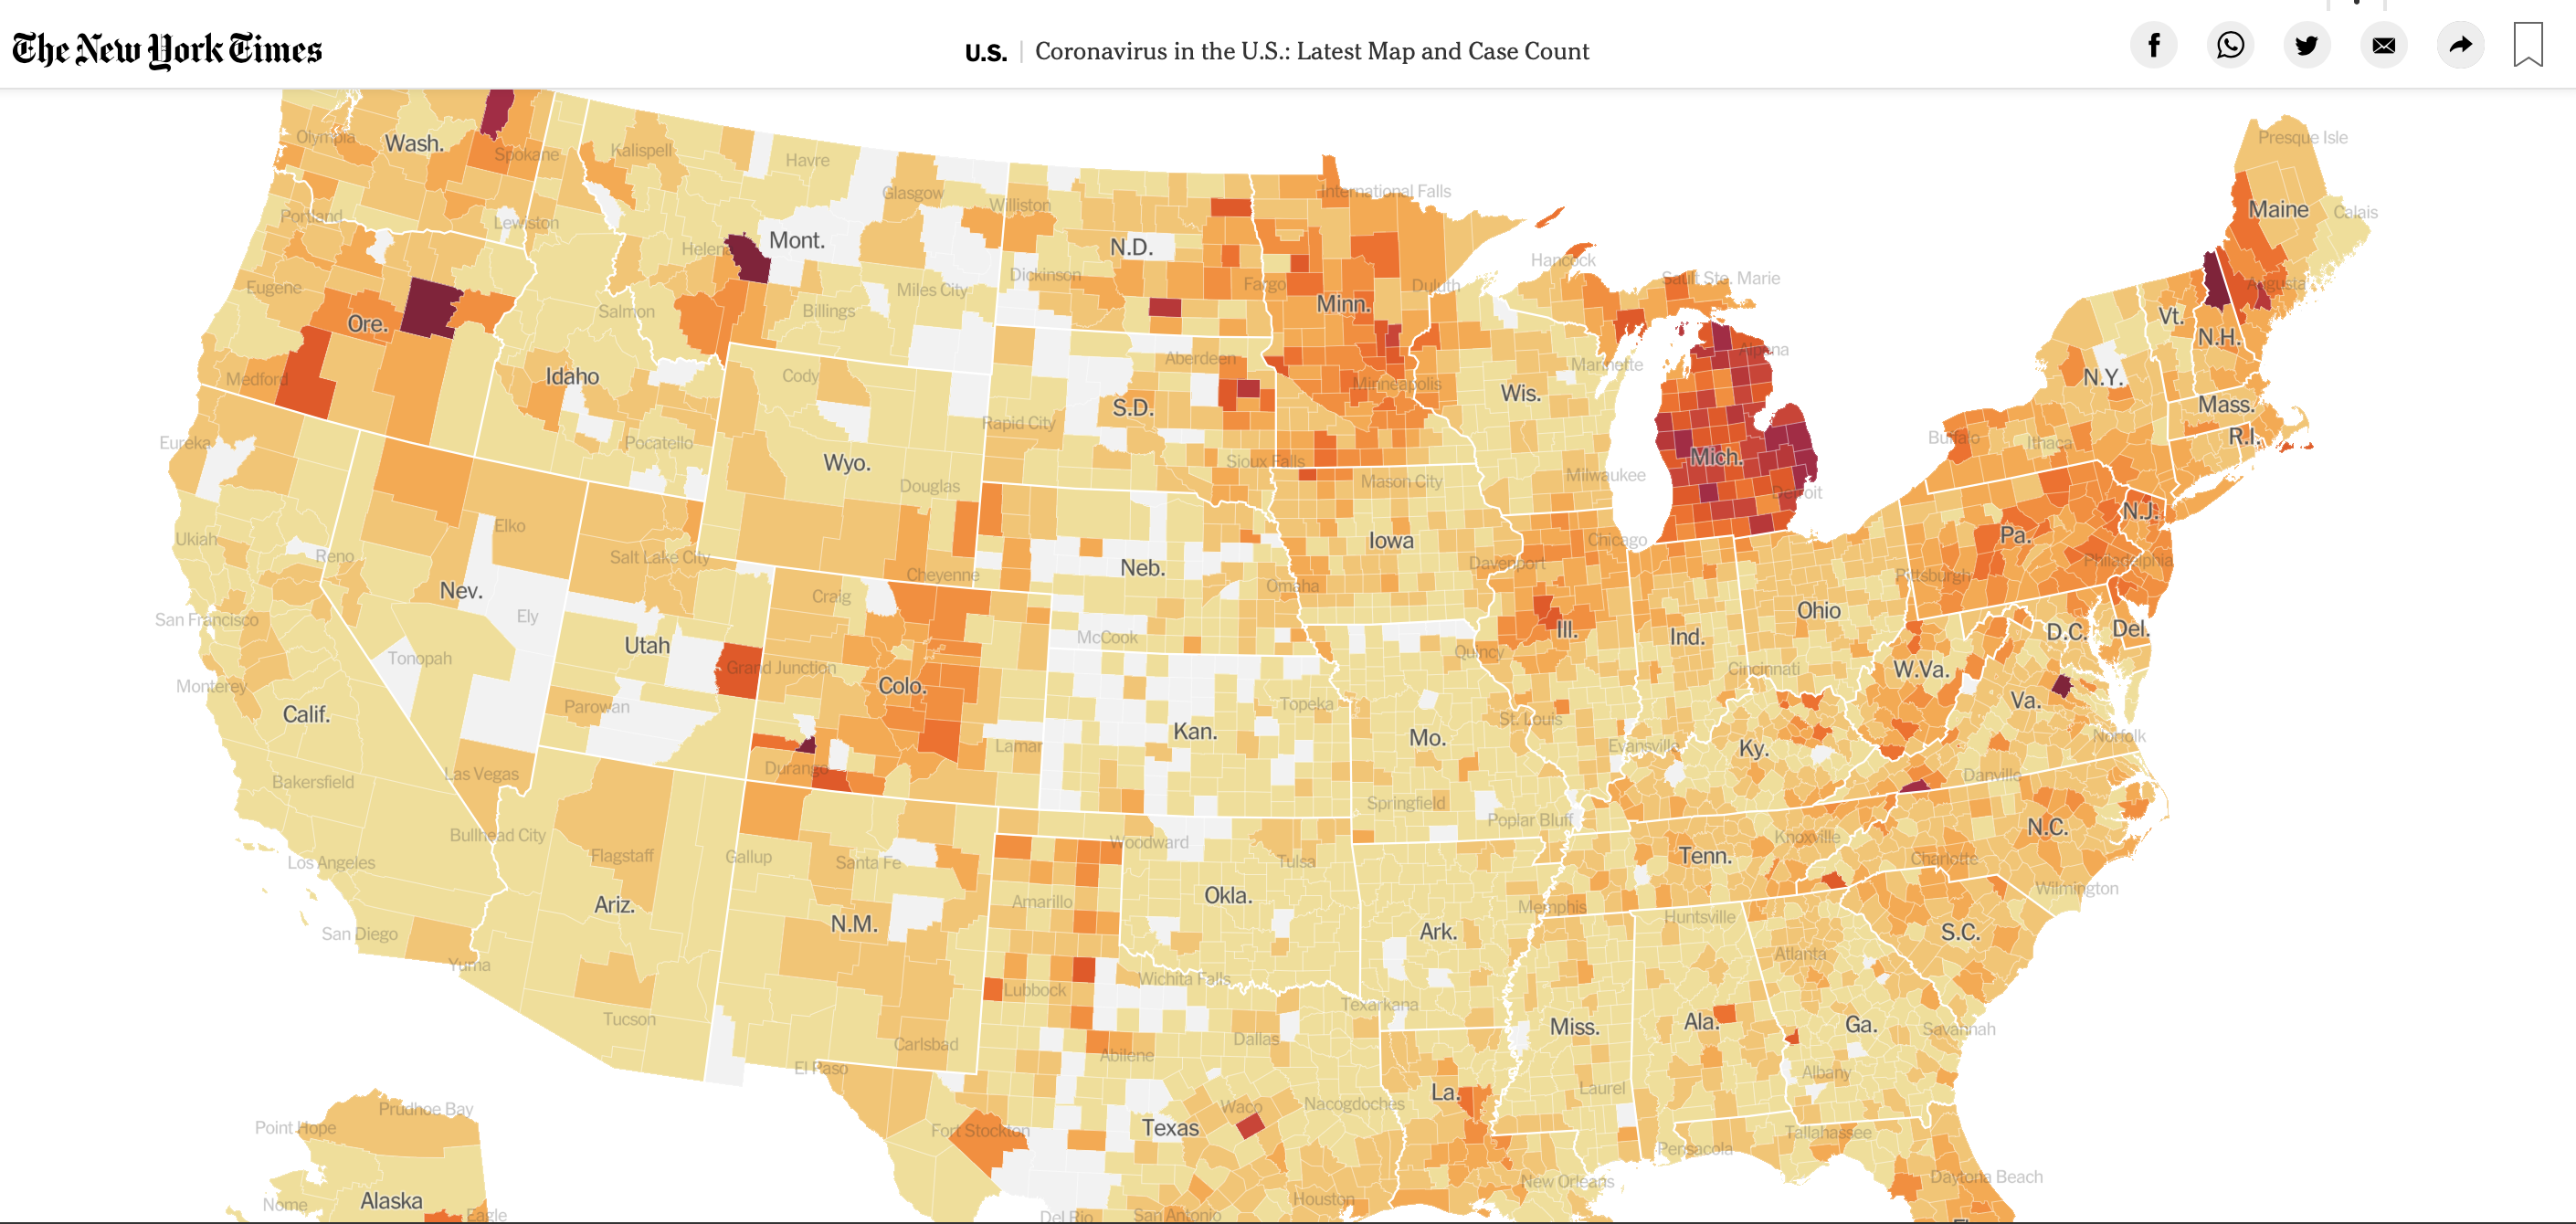

Dictionary 


*   Interest - Interest Numbers represent search interest relative to the highest point on the chart for the given region and time. 

*   100 - the peak popularity for the term.
*   0 - No interst or not enough data to tell. 

*   Subregion - States in the study.

*   City - Cities in the study.
*   Metro - Metropolitan area in the study.
*   Date - Dates included in the study. 
(Dates read by Year-Month-Day-T(time)-Hour)

**** Data is from March 2020 to April 20th 2021








In [1]:
#loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#files
CITY = pd.read_csv("/content/CITY.csv")
METRO = pd.read_csv("/content/METRO.csv")
SUBREGION = pd.read_csv("/content/SUBREGION.csv")
DATE = pd.read_csv("/content/DATE.csv")

In [3]:
#preview
print(CITY.columns)
print(METRO.columns)
print(DATE.columns)
print(SUBREGION.columns)

Index(['City', 'Interest'], dtype='object')
Index(['DMA', 'Interest'], dtype='object')
Index(['Time', 'Interest'], dtype='object')
Index(['Region', 'Interest'], dtype='object')


In [4]:
CITY.head()

,City,Interest
0,Raleigh,100
1,Los Angeles,86
2,Charlotte,76
3,Atlanta,73
4,San Antonio,73


In [5]:
CITY.shape

(14, 2)

In [6]:
DATE.head()

,Time,Interest
0,2021-04-15T16,33
1,2021-04-15T17,37
2,2021-04-15T18,34
3,2021-04-15T19,47
4,2021-04-15T20,46


In [7]:
DATE.shape

(168, 2)

In [8]:
METRO.head()

,DMA,Interest
0,Bluefield-Beckley-Oak Hill WV,100.0
1,Wheeling WV-Steubenville OH,97.0
2,Binghamton NY,93.0
3,Paducah KY-Cape Girardeau MO-Harrisburg-Mount ...,92.0
4,Erie PA,92.0


In [9]:
METRO.shape

(210, 2)

In [10]:
SUBREGION.head()

,Region,Interest
0,Vermont,100
1,North Dakota,98
2,Utah,97
3,West Virginia,95
4,Delaware,94


In [11]:
SUBREGION.shape

(51, 2)

In [12]:
# QUESTION 1

In [13]:
#1 North Dakota was listed as number two in states with the highest cases per 100,000,
# How high is North Dakota's interest in panic attacks and is it's interest in the 90s?


In [42]:
SUBREGION[(SUBREGION['Interest'] >= 90)]


,Region,Interest
0,Vermont,100
1,North Dakota,98
2,Utah,97
3,West Virginia,95
4,Delaware,94
5,New Hampshire,92


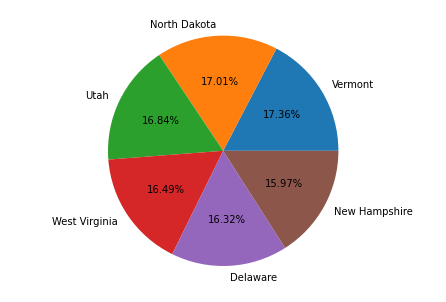

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Vermont', 'North Dakota', 'Utah', 'West Virginia', 'Delaware','New Hampshire']
students = [100,98,97,95,94,92]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

# I chose a pie chart because it was the only chart/graph that would make any sense and because a chart/graph needed to be choosen. 

In [ ]:
# QUESTION 2

For question 2, I was interested in seeing at what date and what time of day were interests in panic attack the highest in google searches. I wanted to see if panic attack searches were the highest at the beginning of the pandemic compared to an entire year after it's beginning.

In [ ]:
#2 What date & time was the panic attack searches at its peak from the beginning of the study to the most recent records and what was its peak? 
#2021-04-19T02
DATE[DATE["Interest"] ==100]["Time"].value_counts()

2021-04-19T02    1
Name: Time, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


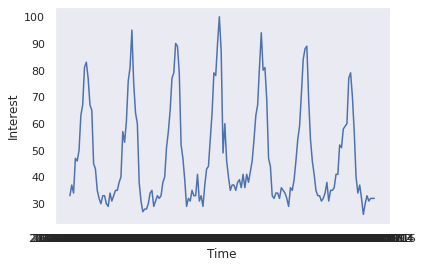

In [ ]:
info = DATE.iloc[10:13,:10]
ax = fig.add_axes([0,0,2,1])

DATE[DATE["Interest"] ==100]["Time"].value_counts()

sns.lineplot(data=DATE, x="Time", y="Interest")

# Only two graphs/charts were required for this assignment.
# However,I did insert this graph just to get a sense of how much data was there for the dates/time frames.

I found the results suprising. April, 19th, 2021 at around 2pm being the highest was a bit of a shock because cases have been reduced tremendously and I assumed that the fear or curiousity surrounding panic attacks would fall as well. 

In [ ]:
# QUESTION 3

The East Coast was recorded to have the highest covid-19 cases in the past year. I wanted to to see if there was any correlation between the number of cases in those states and the number of people who have searched what a panic attack is (possibly to see if they were experiencing one). 

"East Coast" States- Maine, New Hampshire, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Delaware, Maryland, Virginia, North Carolina, South Carolina, Georgia, and Florida.

In [ ]:
#3 How many states in the top-10 (0-9) of states that searched panic attack were in the East coast and which states were they?
SUBREGION.head 
# extracting top 10
large10 = SUBREGION.nlargest(10, 'Interest')
#display
large10

,Region,Interest
0,Vermont,100
1,North Dakota,98
2,Utah,97
3,West Virginia,95
4,Delaware,94
5,New Hampshire,92
6,Alaska,89
7,Connecticut,87
8,Kentucky,87
9,Pennsylvania,87


Vermont, Delaware, New Hampshire, Conneticut, Pennsylvania

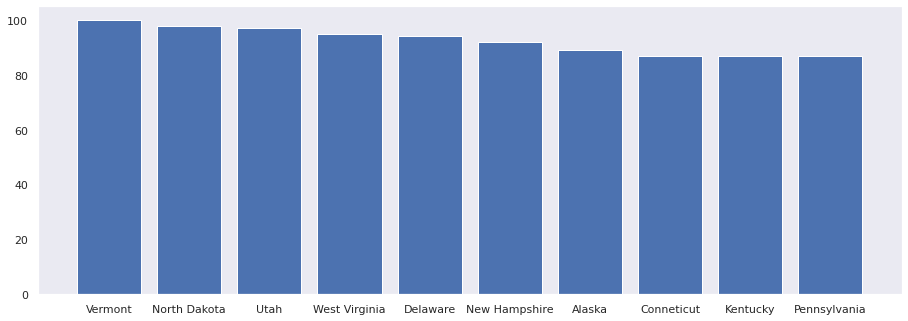

In [ ]:
# Graph 

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
langs = ['Vermont', 'North Dakota', 'Utah', 'West Virginia', 'Delaware','New Hampshire', 'Alaska', 'Conneticut', 'Kentucky', 'Pennsylvania']
students = [100,98,97,95,94,92,89,87,87,87]
ax.bar(langs,students)
plt.show()

# I chose a histogram because it made the most sense to show all of the states and the decline. 

It was unsurprising to see 5 east coast states in the top-10 of states with the highest 'panic attack' interest rates. However, I did think that certain states such as New York and Florida would be included in the top-10 because of how high the cases have been in those specific states in the past year. 